### В този notebook съм използвал доста неща, които са от предната версия на домашното, която е във файла "Homework house prices.ipynb", който се намира в репозиторито. Първата версия е доста по-подробна, а тук съм използвал само най-важните точки от нея.

### Направих тази версия, защото в предната имах някакви проблеми с dummy фийчърите, one-hot-encode и не се получиха

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#import warnings
from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

#warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

%matplotlib inline

# Нека първо да разгледаме и анализираме данните

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


Забелязва се голямо количество на липсващи стойности

In [7]:
# всъщност нямаме нужда от колона за id
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

Нека веднага проверим за висока корелация между атрибути

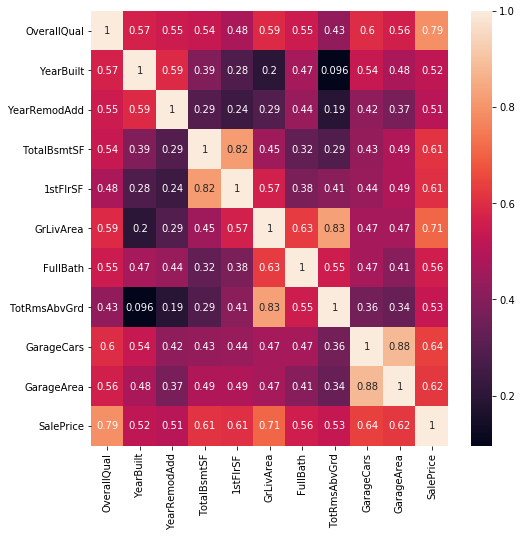

In [8]:
corr_matrix = train.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"])>0.5]
plt.figure(figsize=(8,8))
g = sns.heatmap(train[top_corr_features].corr(),annot=True)

На последния ред може да видим корелацията между целевия атрибут и атрибутите, които корелират най-силно с него.

Ще визуализираме разпредлението между целевия атрибут и най-силно корелираните с него, като ще премахваме и outliers.

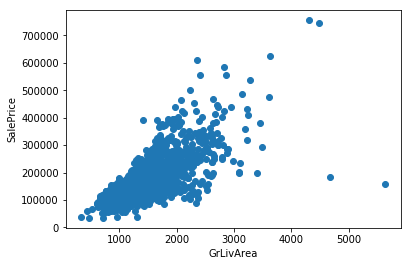

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GrLivArea', fontsize=10)
plt.show()

Тук се забелязват outliers

In [10]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

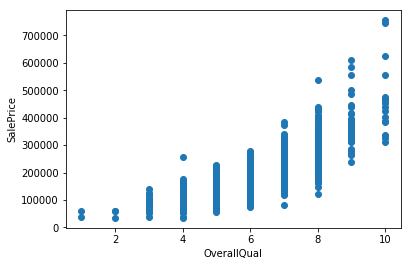

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('OverallQual', fontsize=10)
plt.show()

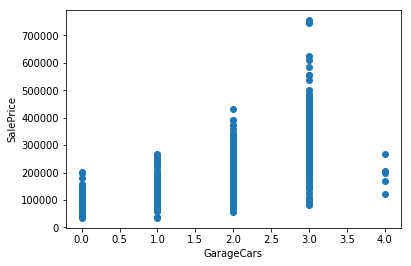

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = train['GarageCars'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GarageCars', fontsize=10)
plt.show()

Като че ли, последната колона показва наличие на outliers. 

In [13]:
train[train['GarageCars'] == 4]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
420,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Alloca,206300
747,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
1190,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1340,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1350,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


Имаме само 5 записа, в които 'GarageCars' е 4, затова ще ги изтрием.

In [14]:
train = train.drop(train[train['GarageCars'] == 4].index)

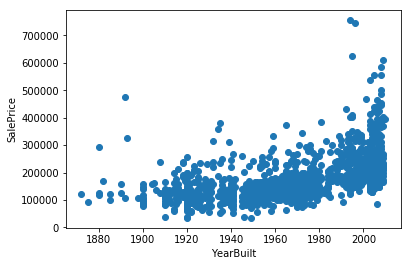

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = train['YearBuilt'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('YearBuilt', fontsize=10)
plt.show()

Логиката, а и графиката показват, че по-новите къщи струват повече, затова старите скъпи къщи ще ги сметнем за outliers и ще ги изтрием.

In [17]:
train = train.drop(train[(train['YearBuilt'] < 1910) & (train['SalePrice'] > 250000)].index)

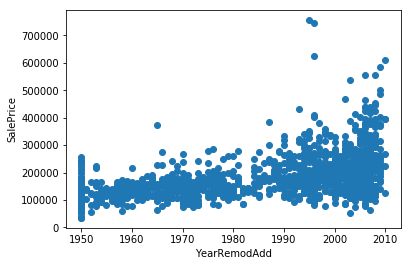

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = train['YearRemodAdd'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('YearRemodAdd', fontsize=10)
plt.show()

In [19]:
train[(train['YearRemodAdd'] == 1965) & (train['SalePrice'] > 160000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950


In [20]:
train = train.drop(train[(train['YearRemodAdd'] == 1965) & (train['SalePrice'] > 160000)].index)
train = train.drop(train[(train['YearRemodAdd'] < 1970) & (train['SalePrice'] > 300000)].index)
train = train.drop(train[(train['YearRemodAdd'] < 2000) & (train['SalePrice'] > 500000)].index)

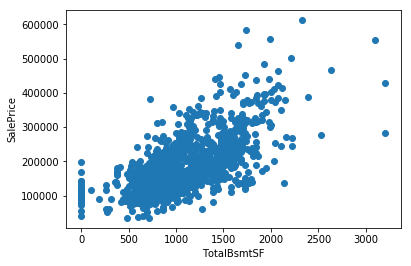

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('TotalBsmtSF', fontsize=10)
plt.show()

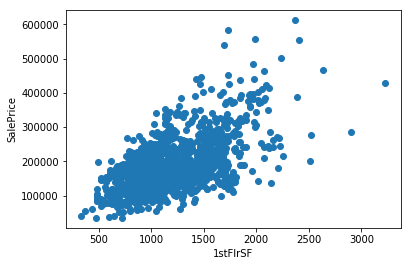

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = train['1stFlrSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('1stFlrSF', fontsize=10)
plt.show()

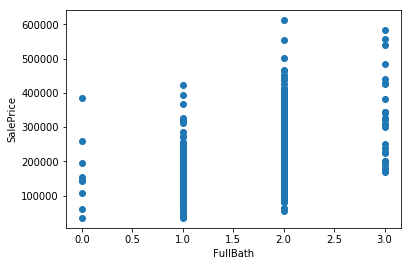

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = train['FullBath'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('FullBath', fontsize=10)
plt.show()

In [24]:
train = train.drop(train[(train['FullBath'] == 0) & (train['SalePrice'] > 350000)].index)

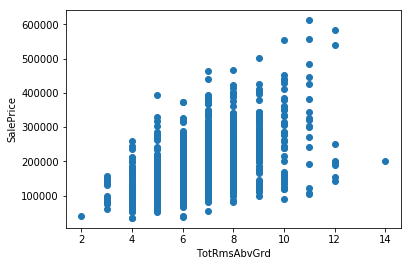

In [25]:
fig, ax = plt.subplots()
ax.scatter(x = train['TotRmsAbvGrd'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('TotRmsAbvGrd', fontsize=10)
plt.show()

In [26]:
train = train.drop(train[(train['TotRmsAbvGrd'] == 14) & (train['SalePrice'] < 250000)].index)

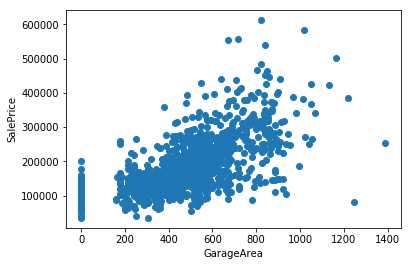

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=10)
plt.xlabel('GarageArea', fontsize=10)
plt.show()

In [28]:
train = train.drop(train[(train['GarageArea'] > 1200) & (train['SalePrice'] < 300000)].index)

In [29]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1441.000000,1184.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1433.000000,1441.000000,1441.000000,...,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.00000,1441.000000,1441.000000,1441.000000,1441.00000
mean,56.637752,69.470439,10117.902845,6.081194,5.571825,1971.436502,1984.815406,101.480809,435.359473,46.492019,...,92.787647,45.918112,21.975711,3.454545,14.975017,2.07703,43.188064,6.321305,2007.818876,179107.33796
std,42.063402,22.932312,7099.245041,1.355928,1.105170,29.937486,20.684853,174.590634,427.041102,160.994574,...,122.407610,64.200934,60.718854,29.507476,55.124853,35.56696,498.877455,2.701882,1.331699,75131.98309
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2006.000000,34900.00000
25%,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.000000,2007.000000,129900.00000
50%,50.000000,69.000000,9430.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,381.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000,2008.000000,162000.00000
75%,70.000000,80.000000,11475.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,705.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.00000,0.000000,8.000000,2009.000000,213000.00000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.00000,15500.000000,12.000000,2010.000000,611657.00000


Нека сега по-обстойно да погледнем и целевия атрибут

/home/iliyan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


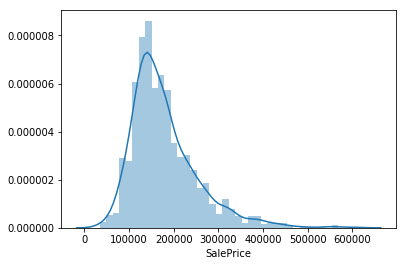

In [30]:
sns.distplot(train['SalePrice'])

Забелязва се Right-Skewed разпределение.


 mu = 179107.34 and sigma = 75105.91



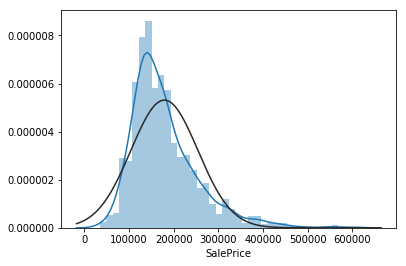

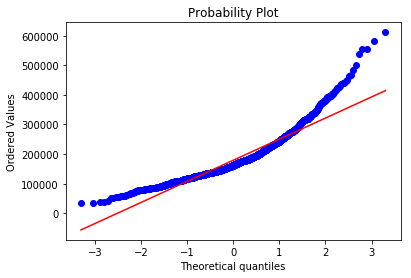

In [33]:
def check_skewness(col):
    sns.distplot(train[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
check_skewness('SalePrice')

Най-добрият начин да го оправим е чрез логаритмуване


 mu = 12.02 and sigma = 0.39



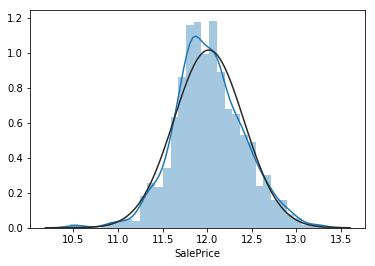

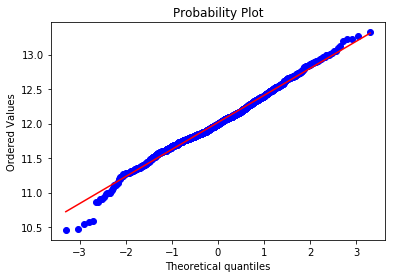

In [37]:
train["SalePrice"] = np.log1p(train["SalePrice"])

check_skewness('SalePrice')

In [38]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2900, 79)


/home/iliyan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


# Обработка на липсващи стойности

In [39]:
nan_frame = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
nan_frame[nan_frame.sum(axis=1) > 0]

/home/iliyan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Train,Test
Alley,1352,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


Text(0.5, 1.0, 'Percent missing data by feature')

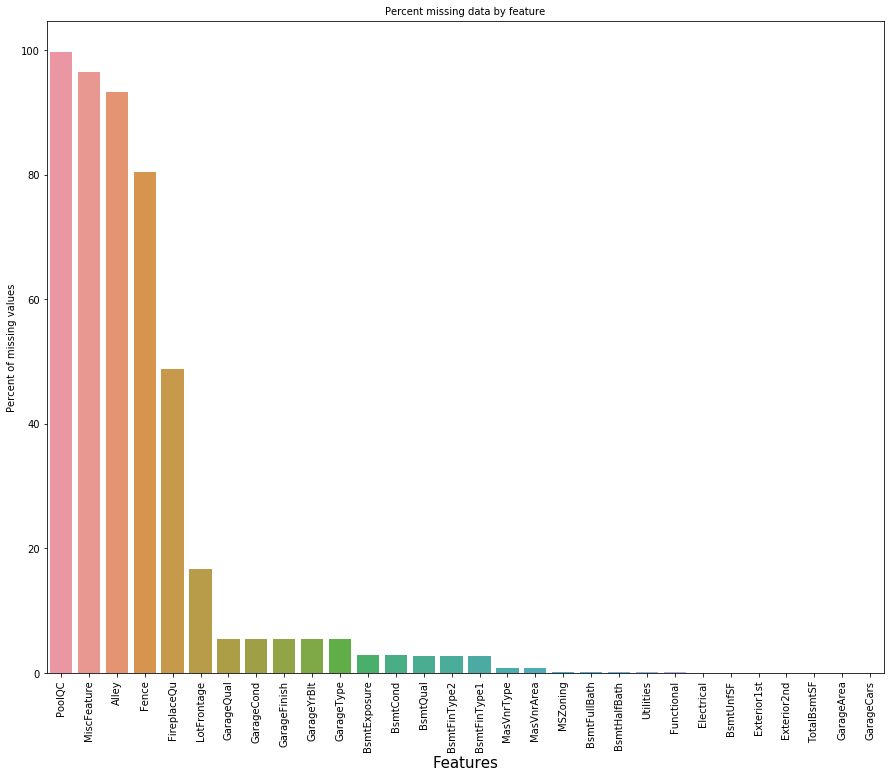

In [41]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=10)

In [42]:
# от описанието знаем, че NaN стойност тук значи, че басейн липсва
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [43]:
# аналогично и тук и в следващите три
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [44]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [45]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [46]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [47]:
# ще групираме по квартали и ще запълним с медианната стойност
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [48]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [49]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [50]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [51]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [52]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [53]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [54]:
all_data = all_data.drop(['Utilities'], axis=1)

In [55]:
# стойност NA тук означава typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [56]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [57]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [58]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

In [59]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [60]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [61]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [63]:
sum(all_data.isnull().sum())

0

Няма повече липсващи стойности

# Да си поиграем още малко с фийчърите

Някои от атрибутите са категорийни с категории числа, затова трябва да контвертираме тези стойности до стрингове

In [64]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [65]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

all_data.shape

(2900, 78)

In [66]:
# добаване на още един важен фийчър
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [67]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2900, 220)

In [68]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Трениране

In [69]:
X_train, X_test, y_train1, y_test = train_test_split(train, y_train, test_size=0.2, random_state = 42)

In [72]:
alpha = [0.001, 0.01, 0.1, 1, 2, 5, 10, 15, 20, 30, 40, 50, 90, 100]

for a in alpha:
    all_data_lr = Ridge(alpha=a).fit(X_train, y_train1)
    print("alpha: ", a)
    print(all_data_lr.score(X_train, y_train1), all_data_lr.score(X_test, y_test))
    print()

alpha:  0.001
0.9426612587895536 0.9074844738883336

alpha:  0.01
0.9426591695503176 0.9078072022495611

alpha:  0.1
0.9425892816515037 0.9097697725731467

alpha:  1
0.9417085941034934 0.9135984762491942

alpha:  2
0.9409237131693304 0.9141000030302611

alpha:  5
0.9391395309225943 0.914284177942294

alpha:  10
0.9370557800533766 0.914517918370656

alpha:  15
0.935500902854253 0.9147562087191323

alpha:  20
0.934238796087918 0.9149370493963066

alpha:  30
0.9322312462628922 0.9151403770126871

alpha:  40
0.9306428188636563 0.9152020275893875

alpha:  50
0.9293156066846991 0.9151791427346696

alpha:  90
0.9254057619444945 0.9147132769815298

alpha:  100
0.9246380580438951 0.9145538033007982



In [75]:
alpha = [0.0009, 0.0005, 0.001, 0.01, 0.1, 1]

for a in alpha:
    all_data_lr = Lasso(alpha=a).fit(X_train, y_train1)
    print("alpha: ", a)
    print(all_data_lr.score(X_train, y_train1), all_data_lr.score(X_test, y_test))
    print()

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha:  0.0009
0.9294193278784905 0.9221083144197891



/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha:  0.0005
0.934611068271988 0.9227421949186974



/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha:  0.001
0.9283883454194185 0.9215774183699229



/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha:  0.01
0.8978329775287865 0.9004464878540374

alpha:  0.1
0.845215543380434 0.8520124526208075

alpha:  1
0.8221371996984838 0.8278287394666578

